# HW 2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sympy as sp

**1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?**

Answer: 
Rolling sevens is more probable. 

For snake eyes, the probability is 1/6 times 1/6 (equal to 1/36) because each die roll is an independent event. Out of all of the possible ways to roll dice (36 ways), there's only way to get two ones.

For rolling sevens, it's the convolution of two die rolls. There's multiple ways to roll a seven:
1+6
2+5
3+4
4+3
5+2
6+1
Out of all the ways one can roll dice (36 ways), this is 6 outcomes. 6/36 = 1/6

The ratio of snake eyes to sevens is $\frac{\frac{1}{36}}{\frac{1}{6}} = \frac{1}{6}$.

**2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).**

*Analytically*:

Sum = 2:
* p(1,1) = 1/6 * 1/6 = 1/36

Sum = 3:
* p(1,2) + p(2,1) = 1/36 + 1/36 = 1/18

Sum = 4:
* p(2,2) + p(3,1) + p(1,3) = 1/36 + 1/36 + 1/36 = 1/12

Sum = 5:
* p(2,3) + p(3,2) + p(4,1) + p(1,4) = 1/36 + 1/36 + 1/36 + 1/36 = 1/9

Sum = 6:
* p(3,3) + p(4,2) + p(2,4) + p(5,1) + p(1,5) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 5/36

Sum = 7:
* p(3,4) + p(4,3) + p(5,2) + p(2,5) + p(1,6) + p(6,1) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 1/6

Sum = 8:
* p(4,4) + p(5,3) + p(3,5) + p(6,2) + p(2,6) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 5/36

Sum = 9:
* p(3,6) + p(6,3) + p(4,5) + p(5,4) = 1/36 + 1/36 + 1/36 + 1/36 = 1/9

Sum = 10:
* p(5,5) + p(6,4) + p(4,6) = 1/36 + 1/36 + 1/36 = 1/12

Sum = 11:
* p(6,5) + p(5,6) = 1/36 + 1/36 = 1/18

Sum = 12:
* p(6,6) = 1/6 * 1/6 = 1/36

*Numerically*:

In [2]:
die = np.array([1/6,1/6,1/6,1/6,1/6,1/6])

sums = np.convolve(die, die)
print("The probability of summing to:" )
for i in range(len(sums)):
    print(f"{i+2} is {sp.nsimplify(sums[i])}")

The probability of summing to:
2 is 1/36
3 is 1/18
4 is 1/12
5 is 1/9
6 is 5/36
7 is 1/6
8 is 5/36
9 is 1/9
10 is 1/12
11 is 1/18
12 is 1/36


**3) Calculate the mean,the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.**

Mean is 7.00 
Variance is 5.83


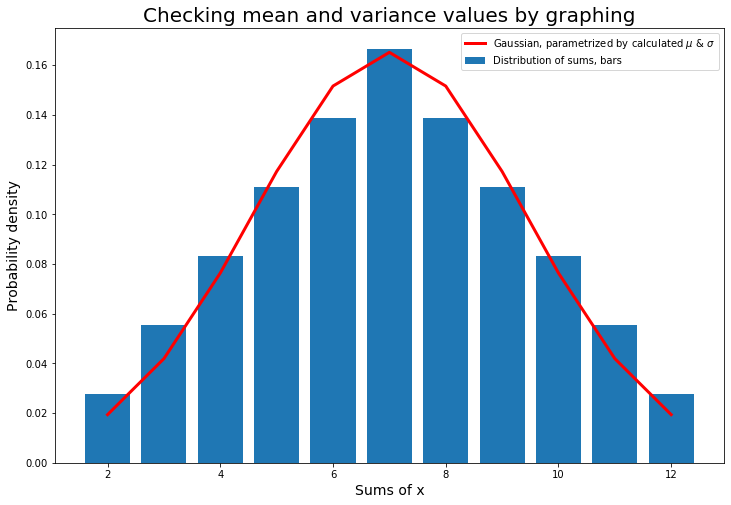

In [3]:
x = np.arange(2,13)
mean = np.sum(x * sums)
square = (x-mean)**2
var = np.sum(square * sums)

print(f"Mean is {mean:.2f} \nVariance is {var:.2f}")

fig,ax = plt.subplots(figsize= (12,8))
ax.bar(x, sums, label = 'Distribution of sums, bars')
ax.plot(x, stats.norm.pdf(x, mean, np.sqrt(var)), color = 'red', linewidth = 3, label = r'Gaussian, parametrized by calculated $\mu$ & $\sigma$')
plt.xlabel('Sums of x', size = 14)
plt.ylabel('Probability density', size = 14)
plt.title('Checking mean and variance values by graphing', size = 20)
ax.legend(loc = 0);

**4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.**

In [4]:
x_new = np.arange(10, 61)
sum_2 = np.convolve(die, die)
sum_4 = np.convolve(sum_2, sum_2)
sum_8 = np.convolve(sum_4, sum_4)
sum_10 = np.convolve(sum_8, sum_2)

mean = np.sum(x_new * sum_10)
square = ((x_new - mean)**2)
var = np.sum(square * sum_10)
mean_new = mean/10 #average of 10 dice
var_new = var/10 # same as above
print(f"Mean is {mean_new:.2f}, Variance is {var_new:.2f}")

Mean is 3.50, Variance is 2.92


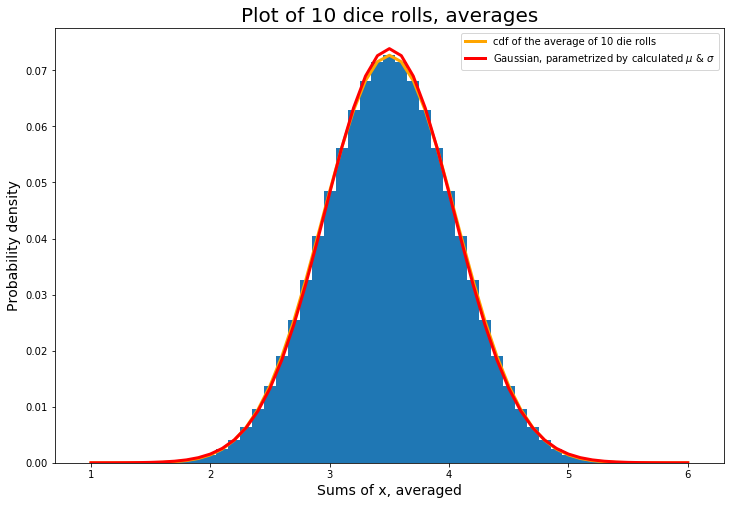

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x_new/10, sum_10, width = 0.1,)
ax.plot(x_new/10, sum_10, c='orange', linewidth = 3, label ='cdf of the average of 10 die rolls')
ax.plot(x_new/10, stats.norm.pdf(x_new/10, mean_new, np.sqrt(var_new/10))/10, color = 'red', linewidth = 3, label = r'Gaussian, parametrized by calculated $\mu$ & $\sigma$')
plt.title('Plot of 10 dice rolls, averages', size = 20)
plt.xlabel('Sums of x, averaged', size = 14)
plt.ylabel('Probability density', size = 14)
ax.legend();

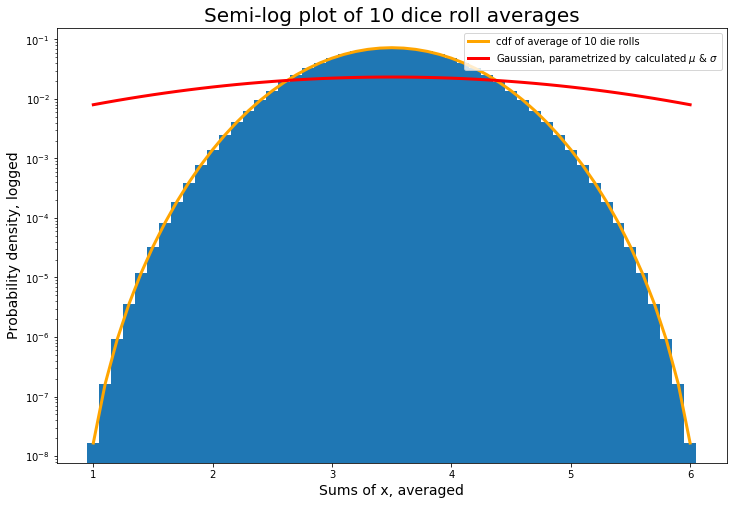

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x_new/10, sum_10, width = 0.1)
ax.plot(x_new/10, sum_10, c='orange', linewidth=3, label ='cdf of average of 10 die rolls')
ax.plot(x_new/10, stats.norm.pdf(x_new/10, mean_new, np.sqrt(var_new))/10, color = 'red', linewidth = 3, label = r'Gaussian, parametrized by calculated $\mu$ & $\sigma$')
plt.yscale('log')
plt.title('Semi-log plot of 10 dice roll averages', size = 20)
plt.xlabel('Sums of x, averaged', size = 14)
plt.ylabel('Probability density, logged', size = 14)
ax.legend();

I believe this is a Gaussian (or almost Gaussian) because when plotted on a semi-log plot, the curve looks like a parabola (see above). That is what Gaussians do. I calculated mean and variance for the 10-die roll averages above, and created a normal pdf with those parameters. Then I plotted it in red, and as you can see, the red and orange curves are pretty close together on both non-logged and semi-logged plots. I know one is a Gaussian for sure, and the other looks very similar tells me it follows similar trends, therefore is also Gaussian (or at the very least veeeeery close to a Gaussian). Also, using the Central Limit Theorem: if a distribution with a mean μ and standard deviation σ takes sufficiently large random samples from the distribution with replacement, the distribution of the sample means will be approximately normally distributed. This is true for any distribution (not just Gaussian) provided the sample size is large enough.

**5) Show that the sum and average of an initially Gaussian distribution is also a Gaussian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Gaussian change? This is a hugely important result. Explore what this means for integrating a signal over time.**

In [7]:
dist = stats.norm.rvs(size = 100000, random_state=69)
x = np.arange(0,10000)

sum_ = []
for i in range(10000):
    point = np.random.choice(dist, size = 10)
    sum_.append(np.sum(point))

In the above code block I am making a distribution, randomly sampling and summing. The result can be seen below, and as the Central Limit Theorem (previously paraphrased) suggests, the result is Gaussian. I also found a succintly-put analytical proof for the sum of normally distributed random variables here: https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#Proof

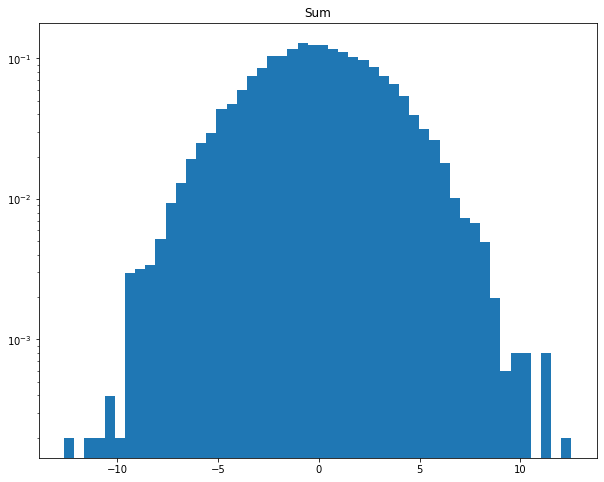

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(sum_, bins=50, density=True)
plt.yscale('log')
plt.title('Sum');

In the code block below, I am doing this again with an average instead of a sum of values. And again, we got a Gaussian!

In [9]:
avg = []

for i in range(10000):
    point = np.random.choice(dist, size = 10)
    avg.append(np.mean(point))

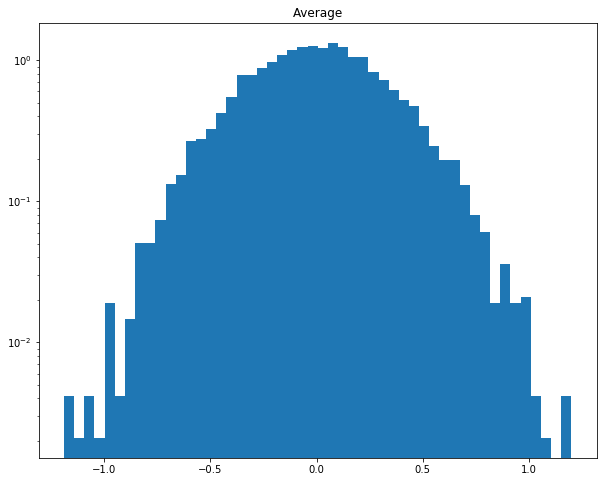

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(avg, bins=50, density=True);
plt.yscale('log')
plt.title('Average');

If I were to repeat this in the sense of convolving values from a Gaussian with another Gaussian, I'd get Gaussians that are "more Gaussian" every time. The mean will converge, but the standard deviation (and hence variance) will become bigger. Like shown in class, the more Gaussians you put together, the wider the resulting Gaussian. For integrating a signal over time, this means that the change of the standard distribution changes the shape of the Gaussian, and thus affects the signal. The distribution must be re-evaluated to get an accurate value of sigma.